# Tutorial 08: 
# Multiple Linear Regression & Polynomial Regression
Pada latihan kali ini, kita akan menggunakan sample dataset dari Pizza dimana dalam dataset tersebut terdapat **2 buah features variables, yaitu diameter dan jumlah topping** sedangkan yang menjadi **target variable adalah harga pizza**. Karena nilai yang kita coba prediksi adalah continous maka ini adalah contoh kasus regressi. 


### I. Sample Dataset
#### - Training Dataset

In [31]:
import pandas as pd 

pizza = {'diameter'  : [6,8,10,14,18],
         'n_topping' : [2,1,0,2,0], 
         'harga'     : [7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


#### - Testing Dataset

In [32]:
pizza = {'diameter'  : [8,9,11,16,12],
         'n_topping' : [2,0,2,2,0], 
         'harga'     : [11,8.5,15,18,11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


#### - Preprocessing Dataset 


In [33]:
import numpy as np 
x_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

x_test  = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test  = np.array(test_pizza_df['harga'])

print(f'x train: {x_train}')
print(f'y train: {y_train}')
print(f'x test : {x_test}')
print(f'y test : {y_test}')

x train: [[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]
y train: [ 7.   9.  13.  17.5 18. ]
x test : [[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]
y test : [11.   8.5 15.  18.  11. ]


### II. Multiple Linear Regression 
Multiple Linear Regression merupakan **generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables**. Sehingga perbedaan utama dari linear regression dan multiple regression terletak pada **jumlah features dan target** yang digunakan. Secara matematik, metode ini dapat dituliskan sebagai berikut. 
<br>
y = a + b1 * x1 + b2 * x2 + bn * xn

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)    # Training model dengan menggunakan 2 parameter, yaitu x_train dan y_train
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print(f'r squared: {r2}')

r squared: 0.7701677731318468


### III. Quadratic Polynomial Regression
Polynomial Regression memodelkan **hubungan antara independent variable x dan dependent variable y sebagai derajat polynomial dalam x**. Dalam konteks ini, **independent variable x adalah features variable sedangkan dependent variable adalah target**. Untuk menyederhanakan processnya, kita akan pangkas jumlah featuresnya menjadi 1 features saja. Secara matematis, metode ini dapat dituliskan sebagai berikut. 
<br>
y = a + b1 * x + b2 x**2 

#### - Preprocessing Dataset


In [35]:
x_train = np.array(train_pizza_df['diameter']).reshape(-1,1) # Harus di reshape karena dalam sklearn features harus dalam 2 dimensi
y_train = np.array(train_pizza_df['harga'])

print(f'x train: {x_train}')
print(f'y train: {y_train}')

x train: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y train: [ 7.   9.  13.  17.5 18. ]


#### - Polynomial Features
Berdasarkan hasil polynomial didapat nilai 1, 8, 64. Dimana **Nilai 1 didapat dari 8 pangkat 0, Nilai 8 didapat dari 8 pangkat 1, sedangkan Nilai 64 didapat dari 8 pangkat 2**.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2) # Derajat Polinomial 2 
x_train_quadratic = quadratic_feature.fit_transform(x_train)

print(f'x train quadratic: {x_train_quadratic}')

x train quadratic: [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


#### - Training Model

In [37]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

#### - Visualisasi Model

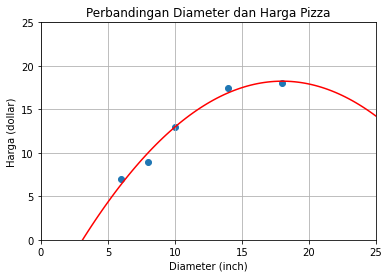

In [38]:
import matplotlib.pyplot as plt 

# Input Graph Data
x_vis = np.linspace(0, 25, 100).reshape(-1,1) # Membuat array list dari 0 sampai dengan 25 sebanyak 100 variable
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

# Plot the Graph
plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis_quadratic, '-r')

# Input Graph Description
plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

### IV. Polynomial Regression: Quadratic vs Cubic

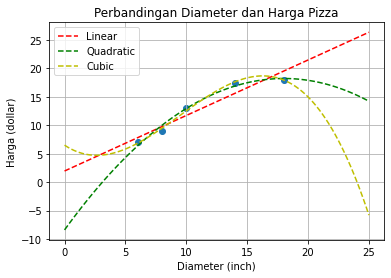

In [45]:
# Training Set
plt.scatter(x_train, y_train)

# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
x_vis = np.linspace(0, 25, 100).reshape(-1,1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label='Linear')

# Polynomial Regression: Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)

model = LinearRegression()
model.fit(x_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis, '--g', label='Quadratic')

# Polunomial Regression: Qubic
cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)

model = LinearRegression()
model.fit(x_train_cubic, y_train)
x_vis_cubic = cubic_feature.fit_transform(x_vis)
y_vis = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis, '--y', label='Cubic')

# Show the Graph
plt.title ('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.grid(True)
plt.show()